<a href="https://colab.research.google.com/github/GauravBFG10K/Global-Terrorism---EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
Explore and analyze the data to discover key findings pertaining to terrorist activities.**

In this capstone project, I will be analyzing the Global Terrorism Dataset. The data set is about the past terror incidents that took place since 1970 till 2017. This is an exploratory data analysis and I will be covering the following operations:



*  **Data Exploration** - Understanding the dataset, columns, a brief information about the data types, the top and bottom of datasets.
*  **Data Handling** - Checking for missing values, NANs, NUll values, handling numerical and categorical variables, filling missing values.
*  **Data visualization** - Visualizing the data using regplots, histograms, heatmaps, boxplots, bar graphs.
*  **Statistical Analysis** - Analyzing the key parameters for correlations, gaining insights and significance of the relationships among these variables, using Chi-square and Pearson correlation tests.
*  **Conclusion** - Drawing insights from the correlations, visualizations and churning out some significant facts from the anlysis.






Importing libraries for analysis

In [57]:
#libraries for data operations
import pandas as pd
import numpy as np
#Statistical operation libraries
from scipy.stats import chi2_contingency
from scipy import stats
#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [58]:
#mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#Reading the file
file_path = '/content/drive/MyDrive/Data Science/EDA Capstone Project/'
df = pd.read_csv(file_path + 'Global Terrorism Data.csv', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Data Exploration : Here we will read and try to understand the data set carefully.

In [60]:
#Top five info of the dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [61]:
#Bottom five info of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
#Info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [63]:
#Column names
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [64]:
#Data type of each column
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

Data Handling: We will create dataframes which we require for analysis from the features available in the dataset. Also, we will perform handling of data which are showing Null/NaN/Missing values.

In [65]:
#Checking for null values in the dataframe
miss_data = df.isnull()
miss_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,...,True,True,True,False,True,True,False,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,...,True,True,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,True


From the above operation, we find that there are several columns that have significantly large number of null values present.

In [66]:
#Here we have dropped column with the NaN values which are significantly high (more than 50%)
df = df.dropna(axis=1, thresh = 181690/2)
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


Now we can see we are left with 58 columns which will show non-null data to the user.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [68]:
#Now, we will eliminate the NaN values from numerical columns
num_col = df.select_dtypes(include=['number']).columns

In [69]:
#Filling the values with zeros
df[num_col]=df[num_col].fillna(0)
df.head(10)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,8,Incendiary,0.0,NaN,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,Firearms,5.0,Unknown Gun Type,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"""Police Chief Quits,"" Washington Post, January...",Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0.0,0,3.0,0.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,0.0,0,-99.0,-99.0,0.0,6,Explosives,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Mil

We can handle the categorical missing values by providing a new category known as "Unknown", to fill in the void.

In [70]:
cat_col = df.select_dtypes(include=['object']).columns
df[cat_col]=df[cat_col].fillna("Unknown")
df.head(10)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Unknown,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,U.S. Embassy,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,Unknown,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,U.S. Consulate,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,8,Incendiary,0.0,Unknown,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,Firearms,5.0,Unknown Gun Type,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"""Police Chief Quits,"" Washington Post, January...",Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,Unknown,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0.0,0,3.0,0.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,0.0,0,-99.0,-99.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,"1/2/1970: Karl Armstrong,

Gaining Insights : Now that we have made the data more comprehensive, we can proceed with the analysis.


In [71]:
df.describe(include=['object'])

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,scite1,dbsource
count,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691,181691
unique,205,12,2855,36674,112493,9,22,113,33238,86006,216,3537,12,31,19149,83989,26
top,Iraq,Middle East & North Africa,Baghdad,Unknown,Unknown,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Unknown,Iraq,Unknown,Explosives,Unknown Explosive Type,Unknown,Unknown,START Primary Collection
freq,24636,50474,7645,10209,66129,88255,43511,11596,58906,6554,24113,82782,92426,44980,67670,66191,78002


In [72]:
#We check the correlation among the variables
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.186302,0.003797,0.030618,0.070646,0.002019,0.026215,-0.016789,0.298888,0.093718,-0.082972,0.137743,0.074173,0.079080,0.032065,-0.022956,0.040570,0.017939,-0.209487,0.083158,0.074702,-0.011716,0.138300,0.021263,-0.001484,0.072794,0.017492,-0.005377,0.047720,-0.278927,-0.009890,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.186348,0.003807,0.030603,0.070659,0.001995,0.026211,-0.016784,0.298921,0.093734,-0.082963,0.137736,0.074153,0.079082,0.032060,-0.022941,0.040579,0.017944,-0.209509,0.083120,0.074661,-0.011737,0.138308,0.021252,-0.001492,0.072788,0.017484,-0.005380,0.047710,-0.278916,-0.009904,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.014956,-0.003832,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012478,-0.004420,-0.002845,0.003071,0.006705,-0.000948,0.002102,-0.004629,-0.004422,-0.001661,0.008665,0.015034,0.018363,0.007863,-0.002528,0.004031,0.003122,0.002720,0.003178,0.001182,0.004041,-0.005816,0.003397,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.005018,-0.002257,-0.007026,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.000394,-0.011802,0.003593,-0.005333,-0.000052,-0.003962,0.003308,-0.002137,-0.003788,-0.014297,0.001426,0.003817,-0.003019,0.008492,-0.003225,-0.001561,-0.000827,-0.001082,0.001177,0.001910,-0.003903,0.004077,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.027918,0.000520,0.057822,0.017784,-0.015029,0.001249,0.048533,0.011637,-0.013440,0.073233,-0.033961,0.272272,0.011613,0.026066,0.015074,0.033536,-0.008929,-0.019961,0.007356,0.008756,0.207802,-0.183161,0.014586,-0.000907,0.011649,-0.010175,-0.001128,0.005234,-0.002096,0.326368,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,0.178287,-0.000275,-0.084591,-0.012291,-0.006646,-0.038480,-0.040288,0.038304,-0.022220,-0.037827,-0.050360,-0.021384,-0.019703,-0.006873,0.598100,-0.009693,0.027918,0.013868,-0.033915,-0.011121,-0.023708,-0.020220,-0.014383,0.003113,-0.012736,-0.006351,0.003409,-0.034333,0.032051,-0.013425,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.310853,0.004241,-0.084186,0.073678,0.025521,-0.013163,-0.010175,0.086831,0.011968,-0.030909,0.112672,0.007642,0.041396,0.027322,0.148646,-0.023315,-0.059963,-0.101237,0.096364,0.012150,0.013257,0.088669,0.043113,-0.008271,0.042193,0.019211,-0.011367,-0.002587,-0.183279,-0.022747,-0.082584,-0.071917,0.043139,-0.047900
latitude,0.186302,0.186348,-0.014956,0.005018,-0.027918,0.178287,0.310853,1.000000,0.001365,-0.127259,0.008537,0.019933,-0.003843,0.007743,0.069184,-0.022708,-0.077754,0.072358,0.006989,-0.025660,-0.054738,-0.006675,-0.058881,0.041240,-0.079035,-0.043379,0.021630,-0.019444,0.129212,-0.016579,0.004780,0.015615,0.016645,0.006662,0.023314,-0.091214,-0.025458,-0.106848,-0.101276,0.094142,-0.050201
longitude,0.003797,0.003807,-0.003832,-0.002257,0.000520,-0.000275,0.004241,0.001365,1.000000,0.001077,0.000579,-0.000254,-0.000197,-0.000878,0.008132,0.000937,-0.000841,0.000476,0.001531,-0.003362,-0.003941,-0.000464,0.000710,0.000111,-0.000566,-0.000192,0.000089,0.001557,0.002618,-0.000570,0.000013,0.000234,0.000203,0.000021,0.000142,-0.001208,0.000297,0.002262,0.002257,0.000361,0.002486
specificity,0.030618,0.030603,0.003621,-0.007026,0.057822,-0.084591,-0.084186,-0.127259,0.00

In [73]:
#Counting the number of terrorism incidents
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

According to this data, we find that Iraq has the most number of terror incidents followed by Pakistan, Afghanistan, India and Colombia as the top five.


In [102]:
#Creating a dataframe comprising of countries and their incident counts
dfc = df['country_txt'].value_counts().to_frame()
dfc.rename(columns={'country_txt': 'valcounts'}, inplace=True)
dfc['country'] = dfc.index
dfc

,valcounts,country
Iraq,24636,Iraq
Pakistan,14368,Pakistan
Afghanistan,12731,Afghanistan
India,11960,India
Colombia,8306,Colombia
...,...,...
International,1,International
Wallis and Futuna,1,Wallis and Futuna
South Vietnam,1,South Vietnam
Andorra,1,Andorra


Text(0, 0.5, 'No of attacks')

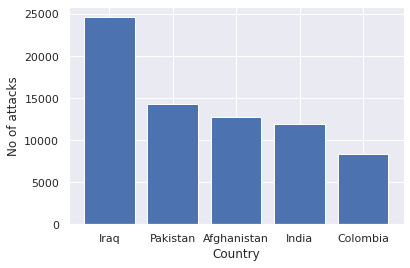

In [75]:
#Barplot showing the top five countries with most terror incidents 
plt.bar(dfc['country'][0:5], dfc['valcounts'][0:5])
plt.xlabel("Country")
plt.ylabel("No of attacks")

According to this data, we find that Bombing/Explosion is the most frequent attack type.

In [95]:
#Creating a dataframe comprising of type of attack happened and their incident counts
dfa = df['attacktype1_txt'].value_counts().to_frame()
dfa.rename(columns={'attacktype1_txt': 'valcounts'}, inplace=True)
dfa['Attacktype'] = dfa.index
dfa

,valcounts,Attacktype
Bombing/Explosion,88255,Bombing/Explosion
Armed Assault,42669,Armed Assault
Assassination,19312,Assassination
Hostage Taking (Kidnapping),11158,Hostage Taking (Kidnapping)
Facility/Infrastructure Attack,10356,Facility/Infrastructure Attack
Unknown,7276,Unknown
Unarmed Assault,1015,Unarmed Assault
Hostage Taking (Barricade Incident),991,Hostage Taking (Barricade Incident)
Hijacking,659,Hijacking


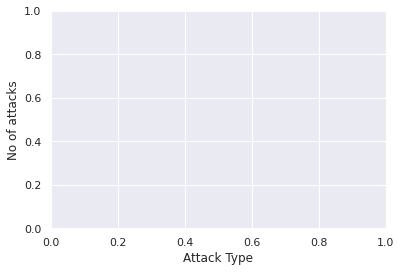

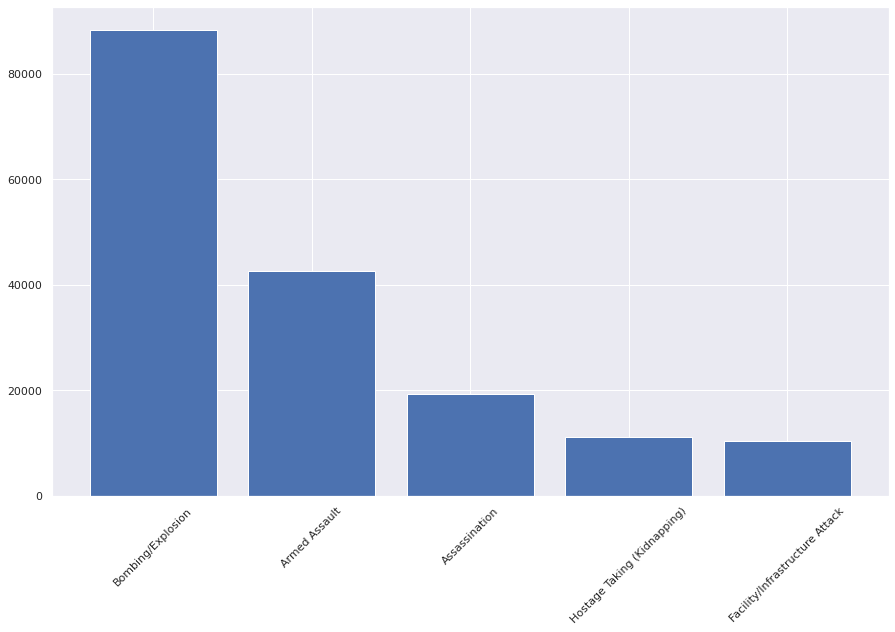

In [77]:
#Barplot showing the frequency of the top five type of attacks 
plt.xlabel("Attack Type")
plt.ylabel("No of attacks")
plt.figure(figsize=(15,9))
plt.bar(dfa['Attacktype'][0:5], dfa['valcounts'][0:5])
plt.xticks(rotation=45)
plt.show()

This suggests that bombing/explosion has been the most occurred incident among teroor attacks which is double of the second attack type.  

(0.0, 9.447194104989517)

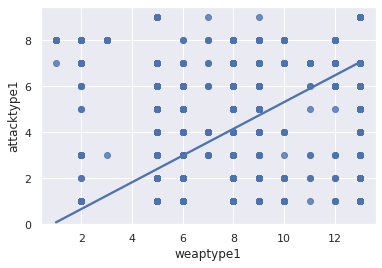

In [78]:
#Plot betweeen type of weapon used and attack type that happened
sns.regplot(x="weaptype1", y="attacktype1", data=df)
plt.ylim(0,)

In [79]:
df[["weaptype1","attacktype1"]].corr()

,weaptype1,attacktype1
weaptype1,1.000000,0.658954
attacktype1,0.658954,1.000000


The correlation and the plot suggests that weaptype1(Type of weapon used) and attacktype1(Type of attack happened) of the terror organizations is moderately correlated.

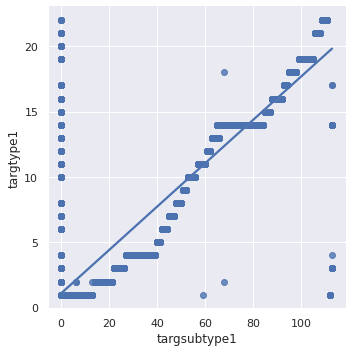

In [80]:
#Plot for target type and target sub type.
sns.lmplot(x="targsubtype1", y="targtype1", data=df)

In [81]:
df[["targsubtype1","targtype1"]].corr()

,targsubtype1,targtype1
targsubtype1,1.00000,0.79611
targtype1,0.79611,1.00000


The correlation and the plot suggests that targsubtype1 and targtype1 of the terror organizations is strongly correlated.

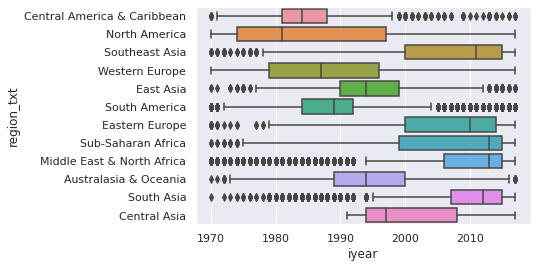

In [82]:
#A boxplot visualizing the region of attack and the timeline
sns.boxplot(x="iyear", y="region_txt", data=df)
sns.set(rc = {'figure.figsize':(15,11)})

From this boxplot we understand that each region had it's own range of difficult years. Thus, in the recent 20 years, Middle East, South Asia, top half of African region and South East Asia have suffered more from terror attacks. 

Text(0, 0.5, 'Frequency')

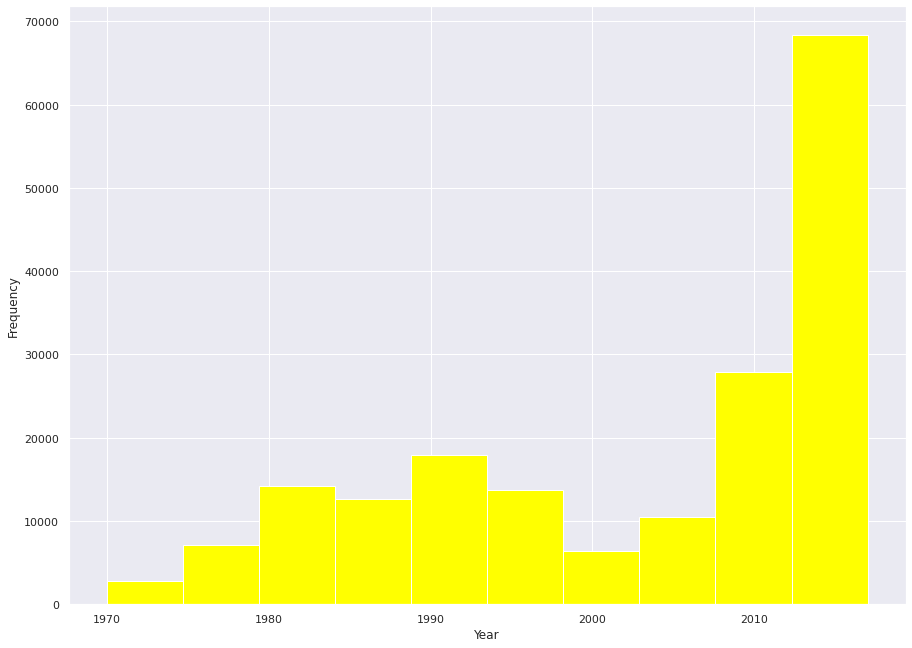

In [83]:
#Using a histogram to plot the incident counts yearwise
year = df[~df['iyear'].isna()]['iyear']
plt.hist(year.values, color='Yellow')
plt.xlabel('Year')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


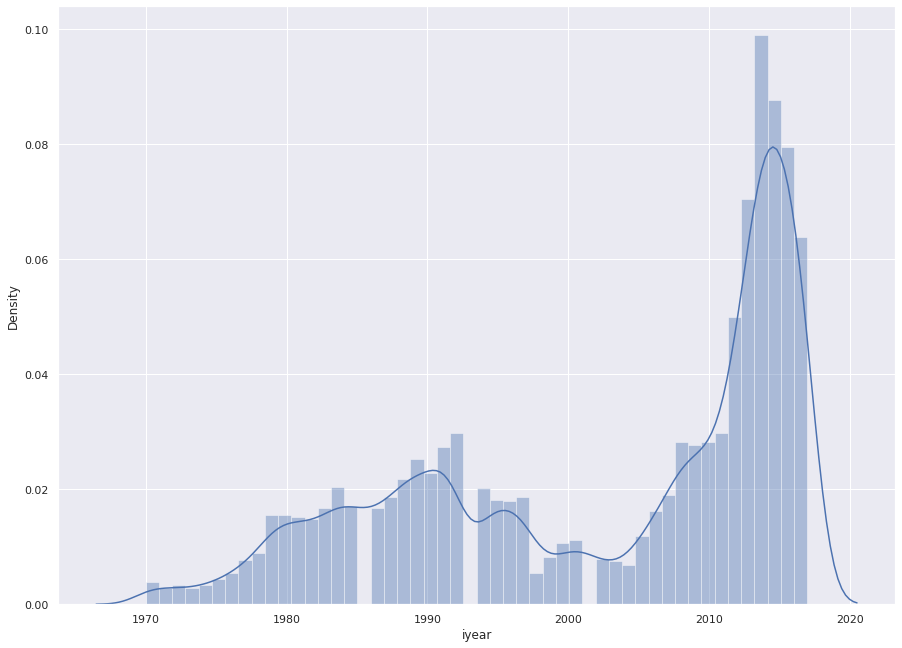

In [84]:
sns.distplot(year, hist=True)

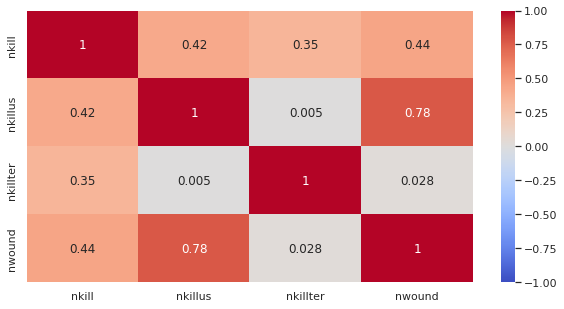

In [85]:
#A heatmap depicting the numbers of kills that include overall, terrorists and US citizens and the wounded people
corr_df = df[["nkill","nkillus","nkillter","nwound"]].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)

Using Chi-Square Test to test the significance among two categorical variables.

We test two categorical variables and check whether they are independent as the null hypothesis. If the p-value shows a value less then 0.05 then it is statistically significant and we reject the null hypothesis. If the p-value goes above 0.05 we assume the null hypothesis to be true.

In [87]:
#Creating a contingency table comprising the region and the type of weapon used
cont1_table = pd.crosstab(df['region_txt'],df['attacktype1_txt'])
cont1_table

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,51,36,75,71,3,6,13,11,16
Central America & Caribbean,4361,1254,3239,403,26,187,501,19,354
Central Asia,116,115,235,20,8,2,45,5,17
East Asia,117,55,330,200,18,3,14,42,23
Eastern Europe,1274,400,2766,260,26,21,220,62,115
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
North America,448,255,1534,906,18,67,123,73,32
South America,3875,2745,9039,803,67,234,1414,47,754
South Asia,11404,4301,21246,2189,93,120,3277,323,2021


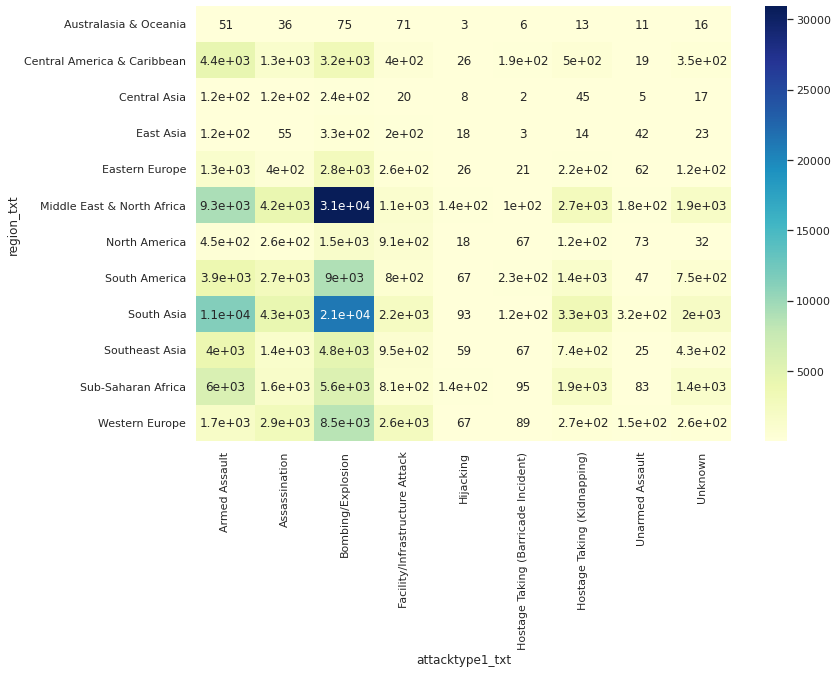

In [88]:
plt.figure(figsize=(12,8)) 
sns.heatmap(cont1_table, annot=True, cmap="YlGnBu")

The number of attacks are extremely high in Middle East(Iraq) and South Asia(Afghanistan,Pakistan,India) region. 

In [89]:
#contingency test
c, p, dof, expected = chi2_contingency(cont1_table) 
print(p)

0.0


This suggests that the correlation between the region and the attack type is statistically significant. Thus, the null hypothesis is rejected.

In [90]:
#Creating a contingency table comprising the region and the type of weapon used
cont2_table = pd.crosstab(df['region_txt'],df['weaptype1_txt'])
cont2_table

weaptype1_txt,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
region_txt,,,,,,,,,,,,
Australasia & Oceania,0,11,80,0,74,74,10,1,0,0,31,1
Central America & Caribbean,0,2,3149,0,5679,435,65,0,0,5,1005,4
Central Asia,0,2,254,1,232,15,14,0,0,0,45,0
East Asia,2,17,333,4,41,252,82,3,10,3,47,8
Eastern Europe,0,12,3089,4,1461,186,90,4,0,4,293,1
Middle East & North Africa,1,73,32283,6,11877,1181,1227,23,0,10,3724,69
North America,24,26,1557,5,682,897,74,18,1,19,138,15
South America,1,26,9098,3,6525,1077,131,6,0,15,2093,3
South Asia,2,83,22568,3,15169,2285,998,16,1,46,3788,15


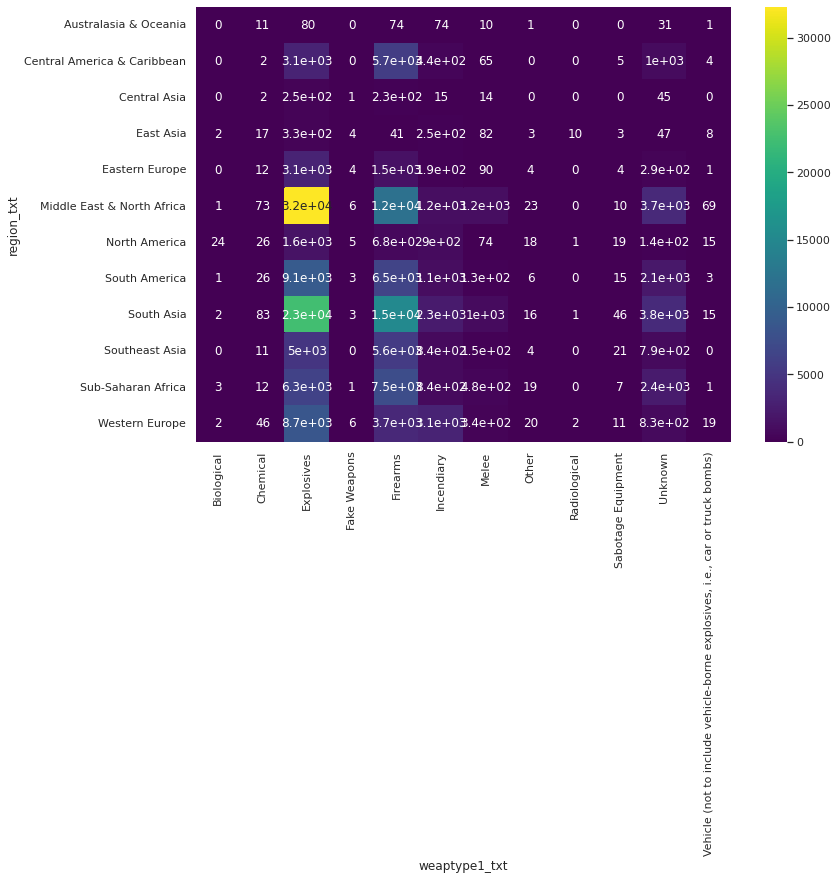

In [91]:
plt.figure(figsize=(12,8)) 
sns.heatmap(cont2_table, annot=True, cmap="viridis")

We can notice in the heatmap where Middle East region is located, the type of weapon used (explosives) is insanely high. This suggests that the access to highly dangerous weapons are far more easy in Middle East and the violence level at this region is very high comparatively.

In [92]:
#contingency test
c, p, dof, expected = chi2_contingency(cont2_table) 
print(p)

0.0


This suggests that the correlation between the region and the weapon type is statistically significant.

Using Pearson Correlation Coefficient to evaluate the relationship between two variables.

    1.The Pearson Correlation measures the linear dependence between two variables X and Y.
    2.The resulting coefficient is a value between -1 and 1 inclusive, where:
      1 - Perfect positive linear correlation
      0 - No linear correlation, the two variables most likely do not affect each other.
     -1 - Perfect negative linear correlation.


In [93]:

#Correlation between Type of attack and Incident Year
pearson_coef, p_value = stats.pearsonr(df['attacktype1'], df['iyear'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.07415294619082843  with a P-value of P = 7.294782079578591e-220


Although the p-value suggests that the correlation is statistically significant as the p-value is very close to zero, the Pearson coefficient suggests the linear relationship among the variables is very weak.

In [94]:
#Correlation between International Logistics and International Ideaology
pearson_coef, p_value = stats.pearsonr(df['INT_LOG'], df['INT_IDEO'])	
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9962113132269224  with a P-value of P = 0.0


Here, the p-value suggests that the correlation is statistically significant as the p-value is very close to zero, the Pearson coefficient suggests the linear relationship among the variables is very strong.

**Conclusions**

We have gone through the dataset of the terrorism info and have gained significant insights and facts from the same. 

The following interesting facts were observed in this EDA:

*   Iraq was found to be the country with most terror attacks in the past 50 years.  
*   Afghanistan tops the list among South Asian countries with most terror attacks, followed by Pakistan and then India.
*    India was among the top five nations suffering the most from terror attacks.
*   Colombia is the country with most terror attacks in South America and overall at fifth place in the list.
*   Terror attacks have risen significantly in the past 10 years.

*   Among all the continents/regions of the world, it is the Middle East with highest terror attacks.
*   Countries from Oceania & Australasia region have suffered least from terror attacks.

*   Significant correlation was found between type of target and type of sub target, which strongly suggests that the intentions of the attacks were clear and focused towards the main target.

*   While armed assaults and bombings are topped by Middle East Region, South Asia dominates the kidnapping and unarmed assault incidents.
*   Year 2014 was found to be the most terror inflicted time.





